## Build a framework to build an "auc" to define the quality of a molecule generative model
- step1: out of all the files in the game get their VALID version
- merge sequentially smiles files and get number of mol via removing dupicates delta

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from source.rdkit_utils import get_valid_non_duplicates, save_smiles
from source.io_utils import delete_file, get_dir_filename_ext

In [ ]:
# To be taken as input from argparse
filelist = {    
    'file_1': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_10k.smiles"),
    'file_2': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_60k.smiles"),
    'file_3': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_110k.smiles"),
    'file_4': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_160k.smiles"),
    'file_5': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_210k.smiles"),
}

# to be taken as input:
# - train file
# - ref file
# - folder of gen smiles

# for each one compute valid_unique
# compute intersection train/ref

In [ ]:
# out_path = Path("/home/nobilm@usi.ch/auc_generation/data/merges")

In [ ]:
# def preprocess_csv(path):
#     dir, filename, ext = get_dir_filename_ext(path)
#     lines = []
#     with open(path) as f:
#         for line in f:
#             start = line.find(',') +1 
#             line = line[start:]
#             end = line.find(',')
#             lines.append(line[:end])

#     save_smiles(lines, dir, filename, '.smiles')

# preprocess_csv("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_10k.csv")
# preprocess_csv("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_60k.csv")
# preprocess_csv("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_110k.csv")
# preprocess_csv("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_160k.csv")
# preprocess_csv("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_210k.csv")

In [3]:
def merge_files(file1, file2, output_file):
    with open(file1, 'r') as f1:
        content1 = f1.read()
    with open(file2, 'r') as f2:
        content2 = f2.read()
    
    with open(output_file, 'w+') as output:
        output.write(content1)
        output.write(content2)
    return output_file

def count_rows(file_path):
    with open(file_path, 'r') as file:
        row_count = sum(1 for line in file)
    return row_count

def count_intersection(a, b):
    merged = merge_files(a, b, out_path/"merged.smiles")
    len_merged = count_rows(merged)
    merged_unique = get_valid_non_duplicates(merged)
    len_merged_unique = count_rows(merged_unique)
    delete_file(merged)
    delete_file(merged_unique)
    return len_merged-len_merged_unique

In [4]:
# To be taken as input from argparse
# filelist = {    
#     'ref': Path("/home/nobilm@usi.ch/auc_generation/data/reference_dataset/maybridge/Maybridge_HitDiscover.sdf"),
        
#     'file_1': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_10k.smiles"),
#     'file_2': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_60k.smiles"),
#     'file_3': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_110k.smiles"),
#     'file_4': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_160k.smiles"),
#     'file_5': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_210k.smiles"),
# }

# to be taken as input:
# - train file
# - ref file
# - folder of gen smiles

# for each one compute valid_unique
# compute intersection train/ref
# 



In [ ]:
# todo insert here compute intersection train/ref

In [5]:
%%capture
for k, v in filelist.items():    
    filelist[k] = get_valid_non_duplicates(v)

# OUT: filelist = { k in [ref, train, file_0, file_1], val_non_dup_filepath.smiles}

*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): O(1)
Removed  - a duplicate of  (#1)
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): O(1)
Removed  - a duplicate of  (#2)
Removed  - a duplicate of  (#3)
Removed  - a duplicate of  (#4)
Removed  - a duplicate of  (#5)
Removed  - a duplicate of  (#6)
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): Si(3);
Removed  - a duplicate of  (#7)
Removed  - a duplicate of  (#8)
Removed  - a duplicate of  (#9)
Removed  - a duplicate of  (#10)
Removed  - a duplicate of  (#11)
Removed  - a duplicate of  (#12)
Removed  - a duplicate of  (#13)
Removed  - a duplicate of  (#14)
Removed  - a duplicate of  (#15)
Removed  - a duplicate of  (#16)
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): N+1(3);
Remove

In [6]:
filelist = {
    'ref': Path("/home/nobilm@usi.ch/auc_generation/ds_val_no_dups/Maybridge_HitDiscover_valid_unique.smiles"),
    # 'train':  Path("/home/nobilm@usi.ch/auc_generation/ds_val_no_dups/guacamol_v1_valid_unique.smiles"),
    'ref_train_intersection': Path("/home/nobilm@usi.ch/auc_generation/ds_val_no_dups/guacamol_v1_train_vs_no_dup_Maybridge_HitDiscover_valid.txt"),
    'file_1': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_10k_valids_no_duplicates.smiles"),
    'file_2': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_60k_valids_no_duplicates.smiles"),
    'file_3': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_110k_valids_no_duplicates.smiles"),
    'file_4': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_160k_valids_no_duplicates.smiles"),
    'file_5': Path("/home/nobilm@usi.ch/auc_generation/future_data/molgpt_guacamol_qed_210k_valids_no_duplicates.smiles"),
}

In [10]:
generations = {
    'file_1': 0,
    'file_2': 0,
    'file_3': 0,
    'file_4': 0,
    'file_5': 0,
}

In [ ]:
def get_value_for_file(filekey):
    count_in_ref = count_intersection(filelist['ref'], filelist[filekey])
    count_in_ref_train_intersection = count_intersection(filelist['ref_train_intersection'], filelist[filekey])
    return count_in_ref - count_in_ref_train_intersection

In [11]:
%%capture
# multiprocess this
for f in generations.keys():
    generations[f] = get_value_for_file(f)

*** Open Babel Warning  in InChI code
  #1 :Salt was disconnected;
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): O(1)
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): O(1)
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): Si(3);
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): N+1(3);
Removed  - a duplicate of  (#1)
Removed  - a duplicate of  (#2)
60698 molecules converted
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): O(1);
Removed  - a duplicate of  (#1)
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): O(1)
Removed  - a duplicate of  (#2)
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence(s): O(1);
*** Open Babel Warning  in InChI code
  #1 :Accepted unusual valence

In [ ]:
generations

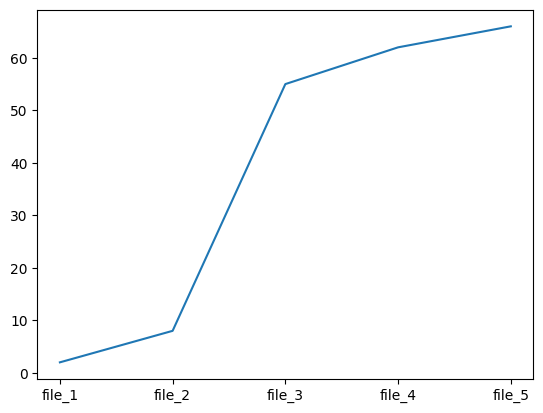

In [1]:
generations = {
    'file_1': 5 -  3,
    'file_2': 18  - 10,
    'file_3': 114  - 59,
    'file_4': 105  - 43,
    'file_5': 132  - 66,
}








import matplotlib.pyplot as plt
plt.plot(list(generations.keys()),list(generations.values()))

In [ ]:
plt.savefig('foo.png')

In [ ]:
#Fill under the curve
plt.fill_between(
        x = list(generations.keys()), 
        y1 = list(generations.values()), 
        # where= (-1 < t)&(t < 1), 
        color= "b",
        alpha= 0.2)

In [ ]:
# import numpy as np
# from sklearn.metrics import auc

# dx = 5
# xx = np.arange(1,100,dx)
# yy = np.arange(1,100,dx)

# print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))

In [ ]:
# import numpy as np
# from scipy.integrate import simpson
# from numpy import trapz

# y = list(generations.values())
# x = [i for i in range(len(list(generations.values())))]


# # Compute the area using the composite trapezoidal rule.
# area = trapz(y, dx=5)
# print("area =", area)

# # Compute the area using the composite Simpson's rule.
# area = simpson(y, dx=5)
# print("area =", area)